In [21]:
#import the minimum packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix  
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.pipeline import make_pipeline

%matplotlib inline

In [8]:
#load and inspect the data
data_set = pd.read_csv("music.csv")
data_set[:3]

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop


In [32]:
data_set.keys()

Index(['age', 'gender', 'genre'], dtype='object')

In [33]:
data_set['genre_name'] = data_set['genre'].map({'HipHop':0, 'Jazz':1, 'Classical':2, 'Dance':3, 'Acoustic':4})

In [34]:
#Extracting Independent and dependent Variable  
x = data_set.iloc[:, [0,1]].values  
y = data_set.iloc[:, 3].values  

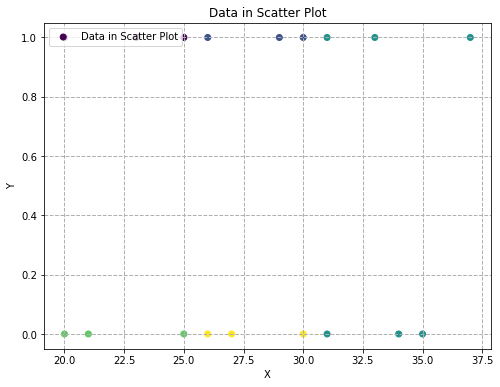

In [35]:
# plot the data (scatter)
plt.figure(figsize =(8, 6))
plt.scatter(x[:,0] ,x[:,1], c = y, label = 'Data in Scatter Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data in Scatter Plot')
plt.legend(loc ='upper left')
plt.grid(True, linestyle ='--', linewidth = 1)
plt.show()

In [36]:
y.shape

(18,)

In [37]:
x[:3]

array([[20,  1],
       [23,  1],
       [25,  1]], dtype=int64)

In [38]:
y[:3]

array([0, 0, 0], dtype=int64)

In [39]:
# Splitting the dataset into training and test set.  
 
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)  

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(14, 2)
(14,)
(4, 2)
(4,)


In [40]:
x_train[:3]

array([[30,  0],
       [29,  1],
       [25,  1]], dtype=int64)

In [41]:
x_test[:3]

array([[23,  1],
       [31,  1],
       [37,  1]], dtype=int64)

In [42]:
#feature Scaling  
  
scalar = StandardScaler()    
x_train = scalar.fit_transform(x_train)    
x_test = scalar.transform(x_test)  

In [43]:
x_train[:3]

array([[ 0.46078208, -0.8660254 ],
       [ 0.23833556,  1.15470054],
       [-0.65145052,  1.15470054]])

In [44]:
x_test[:3]

array([[-1.09634356,  1.15470054],
       [ 0.68322859,  1.15470054],
       [ 2.01790771,  1.15470054]])

In [45]:
#Fitting Logistic Regression to the training set  
 
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train)  

LogisticRegression(random_state=0)

In [46]:
#Predicting the test set result  
y_pred = classifier.predict(x_test) 
y_pred 

array([0, 1, 2, 3], dtype=int64)

In [47]:
y_pred.shape

(4,)

In [48]:
y_true = y
y_true.shape

(18,)

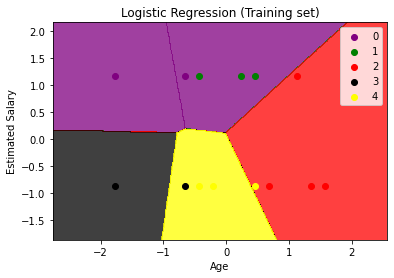

In [53]:
#Visualizing the training set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x_train, y_train  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('purple','green', 'red', 'black', 'yellow' )))  
plt.xlim(x1.min(), x1.max())  
plt.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        color = ListedColormap(('purple', 'green', 'red', 'black', 'yellow'))(i), label = j)  
plt.title('Logistic Regression (Training set)')  
plt.xlabel('Age')  
plt.ylabel('Estimated Salary')  
plt.legend()  
plt.show()  